# Create image out of Circles

## Integrantes

0226594 Sara Carolina Gomez Delgado
0224969 Luis Eduardo Robles Jimenez

## Util

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def objective_function(vec,out, img):
    shapes, t = np.copy(out), np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (vec[3], vec[4], vec[5]), cv2.FILLED)
    t = cv2.addWeighted(t, 1-vec[6], shapes, vec[6], 0)
    return np.sum(np.abs(np.subtract(img, t))) 

In [3]:
def draw_circle(vec, out, p = False):
    shapes = np.copy(out)
    cv2.circle(shapes, (int(vec[0]), int(vec[1])), int(vec[2]), (int(vec[3]), int(vec[4]), int(vec[5])), cv2.FILLED)
    out = cv2.addWeighted(out, 1-vec[6], shapes, vec[6], 0)
    if p: plt.imshow(out), plt.show()
    return out

### Make Animation

In [4]:
def createAnimation(data):
    import matplotlib.animation as animation
    import time

    fig = plt.figure()

    def animate(frame_number):
        global imageToAnimate
        imageToAnimate = draw_circle(data[frame_number], imageToAnimate)
        plt.imshow(imageToAnimate)

    global imageToAnimate
    imageToAnimate = np.zeros(img.shape, np.uint8)
    plt.imshow(imageToAnimate)
    anim = animation.FuncAnimation(fig, animate, frames=data.shape[0], interval=5)

    f = str(int(time.time())) + ".gif"
    writervideo = animation.PillowWriter(fps=60)
    anim.save(f, writer=writervideo)

## Our Differential Evolution

In [5]:
def executeOurs(img, objectiveFunction, bounds, nIter = 30, cR = 0.5, popSize = 25, nMax = 300, animate = False, display = 5, acceptAll = False, initialImage = None):
    from differential_evolution import differential_evolution
    if not initialImage: out = np.zeros_like(img)
    else: out = np.copy(initialImage)
    data = np.zeros((nIter, len(bounds)))
    lastFitness = 100000000
    for i in range(nIter):
        r = differential_evolution(objectiveFunction, bounds, args = (out, img), popSize=popSize, cR = cR, nMax = nMax)
        if r['fun'] > lastFitness and not acceptAll: 
            continue
        if animate: 
            data[i] = r["P"]
        if i % (nIter // np.min((nIter, display))): 
            out = draw_circle(r["P"], out)
        else:
            print(i, r)
            out = draw_circle(r["P"], out, True)
        lastFitness = r['fun']
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(out) 
    if animate: createAnimation(data)

## Scipy Differential Evolution

In [6]:
def executeTheirs(img, objectiveFunction, bounds, nIter = 30, cR = 0.5, popSize = 25, nMax = 300, animate = False, display = 5, acceptAll = False, initialImage = None):
    from scipy.optimize import differential_evolution
    if not initialImage: out = np.zeros_like(img)
    else: out = np.copy(initialImage)
    data = np.zeros((nIter, len(bounds)))
    lastFitness = 100000000
    for i in range(nIter):
        r = differential_evolution(objective_function, bounds, args=(out,img), recombination = cR, popsize = popSize, maxiter = nMax)
        if r.fun > lastFitness and not acceptAll: continue
        if animate: data[i] = r.x
        if i % (nIter // np.min((nIter, display))): out = draw_circle(r.x, out)
        else:
            print(i, r)
            out = draw_circle(r.x, out, True)
        lastFitness = r.fun
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(out) 
    if animate: createAnimation(data)

## Execution

In [7]:
nIter, cR, popSize, nMax = 700, 0.60, 50, 750
# nIter, cR, popSize, nMax = 3, 0.60, 5, 75

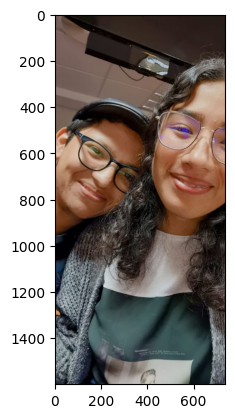

In [8]:
img = cv2.cvtColor(cv2.imread("../../data/ow.jpeg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

h, w, c = img.shape
bounds = [
    [0, w],             # X
    [0, h],             # Y
    [1, (w + h)//4],    # radius
    [0, 255],           # R
    [0, 255],           # G
    [0, 255],           # B
    [0.3, 1],           # alpha
]

0 {'P': array([6.84653058e+02, 6.02429277e+02, 2.61258830e+02, 2.46430230e+02,
       1.12101178e+02, 6.79020116e+01, 5.26390036e-01]), 'nIt': 214, 'fun': 272296288, 'nFev': 12900}


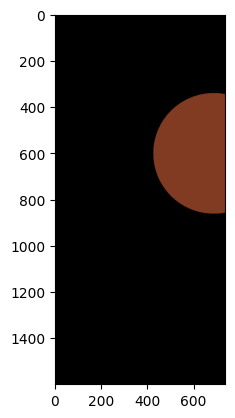

2 {'P': array([9.25641465e+01, 1.56060023e+03, 4.91474711e+02, 7.10549795e+01,
       1.62156075e+02, 1.48492518e+02, 3.03616582e-01]), 'nIt': 188, 'fun': 250402216, 'nFev': 11340}


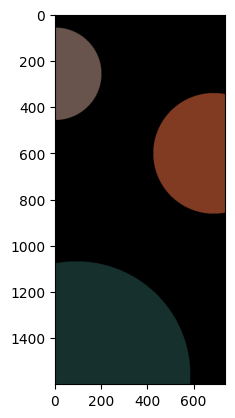

In [10]:
cR = 0.85
executeOurs(img, objective_function, bounds, nIter + 700, cR, popSize + 10, nMax, True, 700, acceptAll=True)

In [ ]:
executeTheirs(img, objective_function, bounds, nIter + 700, cR, popSize + 10, nMax, False, nIter + 700, acceptAll=True)

KeyboardInterrupt: 